# PyTorch Paper Replicating

Milestone Project 2: PyTorch Paper Replicating

In this project, we're going to be **replicating a machine learning research paper** and create a ***Vision Transformer(ViT)*** from scratch in PyTorch

We'll focus on creating the ViT architecture and apply to our FoodVision problem to classify different images of pizza, steak, and sushi.

## What is paper replicating?

The goal of **paper replicating** is to replicate the advances of machine learning with code so that we can use those techniques to our own problem.

We can use a new architecture that can work better on our own problem.

---

Machine Learning paper replicating involves turning a paper comprised of images/diagrams, math, and text into usable code. In our case usable PyTorch code.

![](08-vit-paper-what-is-paper-replicating-images-math-text-to-code.png)

We will convert Diagram, math equations and texts from a [ViT peper](https://arxiv.org/abs/2010.11929) in this project.

**How a Machine learning paper looks like?**
| Section |	Contents |
| :-: | :-:|
| Abstract| 	An overview/summary of the paper's main findings/contributions. |
| Introduction |	What's the paper's main problem and details of previous methods used to try and solve it. |
| **Method** | ***How did the researchers go about conducting their research? For example, what model(s), data sources, training setups were used?*** |
| **Results** |	*What are the outcomes of the paper? If a new type of model or training setup was used, how did the results of findings compare to previous works? (this is where **experiment tracking** comes in handy)* |
| Conclusion |	What are the limitations of the suggested methods? What are some next steps for the research community? |
| References |	What resources/other papers did the researchers look at to build their own body of work? |
| Appendix |	Are there any extra resources/findings to look at that weren't included in any of the above sections?|

## Why replicate a machine learning reseach paper?

A machine learning research paper is often a presentation of months if work and experiments done by some of the best machine leanring teams in the world condensed into a few pages of text.

It would be nice to check them out, if these experiments lead to better results in an area related to the problem we're working on.

***Also, replicating the work of others is a fantastic way to practice our skills.***
![](08-george-hotz-quote.png)

When we first start trying to replicate the research paper, we'll be overwhelmed.

Because, research paper is months/years of wors. It will take sometime to understand and reproduce the works. 

Replicating a research is a tough problem and lot of libraries, such as **`HuggingFace`**, **`PyTorch Image Models` (`timm`)** and **`fast.ai`** have been born out of making machine learning research more accessible.

***Where can we find code examples for machine learning research papers?***

One of the first things we'll notice when it comes to machine learning research is: **There's a lot of it**

So beware, trying to stay on top of it is like trying to outrun a hamster wheel.

Follow your interest, pick a few things that stand out to you.

There are several places to find and read machine learning reserach papers(and the code)

| Resource | What is it? |
| :-: | :-:|
| arXiv | a |
|Ak Twitter | a |
| Papers with Code | A curated collection of `trending`, `active` and `greatest machine learning papers`, many of which `include code` resources attached. Also `includes a collection of common machine learning datasets`, `benchmarks` and `current state-of-the-art models`. |
| lucidrains' `vit-pytorch` GitHub repository | Less of a place to find research papers and `more of an example of what paper replicating with code` on a `larger-scale` and `with a specific focus looks like`. The `vit-pytorch ` repository is a `collection of Vision Transformer model architectures` from `various research papers` **`replicated`** with **`PyTorch code`** (much of the inspiration for this notebook was gathered from this repository). |

## What we're going to cover

We're going to get hands-on and actually replicate a paper. 

***The process of replicating all papers will be slightly different but by seeing what it's like to do one, we'll get momentum ot do more.***

More specifically, we're going to be replicating the machine learning research paper [An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale](https://arxiv.org/abs/2010.11929) (ViT paper) with PyTorch.

The **Transformer** neural network architecture was originally introduced in the machine leanring research paper [Attention is all you need](https://arxiv.org/abs/1706.03762)

***And the original Transformer architecture was designed to work on one-dimensional sequences of text.**

A **Transformer architecture** is generally considered to be any neural network that uses the **attention mechanism**, as its primary learning layer.

This is similar to how convolutional neural network (CNN) uses convolutions as its primary learing layer.

**Vision Transformers (ViT) architecture was designed to adapt the original Transformer architecture to vision problem(s)**

The original Vision Transformer has been through several iterations over the past couple of years, however, we;re going to focus on replicating the original, otherwise known as the **vanilla Vision Transformer**. If we can recreate the original, we ca adapt it to others as well.

***<h3> We're going to focus on building Vit Architecture as per the original ViT paper and apply it to FoodVision.</h2>***

## Table of Contents

| Table | Contents |
| :-: | :-: |
| 0. Setting up | Download the previous code we have written and use it |
| 1. Get Data | Get data |
| 2. Create Datasets and DataLoaders | use `data_setup.py` for this |
| 3. Replicating the Vit Paper: an Overview | Breaking down paper into smaller chunks, so we can replicate the paper chunk buy chunk |
| 4. Equation 1: The Patch Embedding | a|
| 5. Equation 2: Multi-head Attention (MSA) | a|
|6. Equation 3: Multilayer Perceptron (MLP)| a|
|7. Creating the Transformer Encoder |a |
|8. Putting it all together to create ViT | a|
|9. Setting up training code for our Vit Model| a|
|10. Using a pretrianed ViT from `torchvision.models` | a |
|11. Make predictions on a custom image | a|

## 0. Setting up

In [76]:
import torch 
from torch import nn
import torchvision
from torchinfo import summary

print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

torch version: 2.2.2
torchvision version: 0.17.2


In [77]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Get Data

We'll use the `download_data` function from `helper_functions.py` that we created on 07. 

In [4]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

Now let's set the download training and test directories.

In [5]:
train_dir = image_path  / 'train'
test_dir = image_path / 'test'
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2. Create Datasets and DataLoaders

let's convert the data we downloaded to `DataLoader`

we'll use `create_dataloaders()` frm `data_setup.py`

<hr/>
First, we'll create a transform to prepare our images.

***This is where one of the first references to ViT paper will come in.***

In Table 3 (of the ViT Paper), the training resolution is mentioned as being 224 (height = 224, width = 224)
![](08-vit-paper-image-size-and-batch-sizepng)

**Note:** We can often find various hyperparameter settings listed in a table. In this case we're still preparing our data so ***we're mainly concerned with thing like image size and batch size.***

We'll make sure our transform resizes our images appropriately.

`Since we'll be training our model from scratch (no transfer learning), we dont't have to normalize transform like we did in Transfer learning module.`

### 2.1. Prepare transforms for images

In [6]:
IMG_SIZE = 224

# create transform pipeline manually
manual_transform = transforms.Compose([
    transforms.Resize(size=(IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])

manual_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)

### 2.2. Turn Images into `DataLoader`

The ViT paper states that use of of `batch size = 4096` which is 128x the size of the batch size we've been working on.

However, we're going to stick with the batch size of 32.

because of the hardware not being able to handle that many images at a time.

**Note:** we're using `pin_memory=True` becuase it avoids unnecessary copying of memory between the CPU and GPU memory by `pinning` examples that have been seen before. The benefits of this is likely to be seen with larget dataset sizes.

Also `pin_memory=True` doesn't always improve performance. It works sometimes, sometimes it doesn't work.

In [7]:
BATCH_SIZE = 32

#create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transform,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x10725a5c0>,
 ['pizza', 'steak', 'sushi'])

### 2.3 Visualize a single image

An important step in the ViT paper is `preparing the images` into patches.

We'll get to what this means in section 4 but for now, lets view a single image and its label.

In [8]:
# get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# get a single image from the batch
image, label = image_batch[0], label_batch[0]

image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

Now let's view images with `matplotlib`

(-0.5, 223.5, 223.5, -0.5)

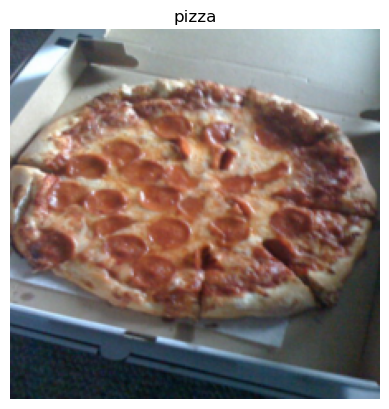

In [9]:
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

## 3. Replicating the ViT Paper: An Overview

Before writing any more code, we should know what we're doing.

We're replicating the `ViT paper` for our own problem - FoodVision.

So our **model inputs** are: `images` of **pizza, steak, or sushi**

and our ideal **model outputs** are: `predicted labels of **pizza, steak, or sushi**

No different to what we've been doing throughout the previous sections.

The question is: **how do we go from our inputs to the desired outputs?**

### 3.1. Inputs and outpus, layers, and blocks

ViT is a deep learning neural network architecture.

And any neural network architecture is generally comprised of **`layers`**

And a collection of layers is often referred to as a `block`.

and stacking many blocks together is what gives us the whole architecture.

---

A **layer** takes an `input`(say an image tensor), performs some kind of function on it (for example what's in the layer's `forward()` method) and then return the output from it.

So if a single layer takes an input and gives an output, then a collection of layers or or a `block` also takes an input and gives an output.

<div class='alert alert-success'>
    Lets make this concrete:
</div>

- **`Layer`** - Takes an `input`, performs a `function` on it, and returns an ouput
- **`Block`** - A `collection of layers`, takes an input, performs a series of functions on it, and returns an output.
- **`Architecture` or model** - a `collection of blocks`, takes an input, performs a series of functions on it, returns an output.

**This ideology is what we're going to be using to replicate the ViT Paper**

We're going to take it `layer by layer`, `block by block`, and `function by function` putting the pieces of the puzzle together like Lego to get our desired overall architecture.

<span class='alert alert-success'> The reason we do this is because looking at a whole research paper can be intimidating.</span>

So for a better understanding, we'll break it down.
- Starting with the inputs and outputs of single layer
- and working up to the inputs and outputs of the whole model.

![](08-vit-paper-intputs-outputs-layers-and-blocks.png)
*A modern deep learning architecture is usually collection of layers and blocks. Where layers take an input. and maniputate it using some kind of function, and then output it. `Blocks` are generally stacks of layers on top of each other doing a similar thing to a single layer but multiple times*

- `input` - data as a numerial representation
- `function` - the self-attention formula pictured above, however, this function could be almost anything

### 3.2. Getting Specific: What's ViT made of?

There are many little details about the ViT model sprinkled throughout the paper.

Finding them all is like one big treasure hunt.

Remember, **A research paper is often months of work compressed into a few pages so it's understandable for it to take of practice to replicate.**

However, the main three resources we'll be looking at for the architecture design are:
1. **Figure 1** - This gives an overview of the model in a graphical sense, we could almost recreate the architecture with this figure alone.
2. **Four equations in section 3.1** - These equations give a little bit more of a mathematical grounding to the colored blocks in Figure 1.
3. **Table 1** - This table shows the various hyperparameter settings (such as number of layers asnd number of hidden units) for different ViT model variants. We'll be focused on the smallest version,`ViT-Base`.


#### 3.2.1 Exploring **`Figure 1`**
Let's start by going through Figure 1 of the ViT Paper.

The main things we'll be playing attention to are:

1. **Layers** - takes an **`input`**, performs an operation or function on the input, produces an **`ouput`**
2. **Blocks** - a collection of layers, which in turn also takes an **input** and produces an **output**

![](08-vit-paper-figure-1-inputs-and-outputs.png)

*Figure 1 from the ViT Paper showcasing the different inputs, outputs, layers, and blocks that create the architecture. Our goal will be to replicate each of these using PyTorch code.*

The ViT architecture is comprised of several stages:

- **Patch + Position Embedding (inputs)** - Turns the input image into a sequence of image patches and adds a position number to specify in what order the patch comes in.
  
- **Linear projection of flattened patches (Embedded Patches)** - The image patches get turned into an **embedding**, the benefit of using an embedding rather than just the image values is that an embedding is a *learnable* representation (typically in the form of a vector) of the image that can improve with training.

- **Norm** - This is short for `Layer Normalization` or `LayerNorm`, a techinique for regularizing (reducing overfitting) a neural network, you can use `LayerNorm` via the PyTorch layer `torch.nn.LayerNorm()`

- **Multi-Head Attention** - This is a `Multi-Headed Self-Attention layer` or `MSA` for short. We can create an MSA layer via the PyTorch layer `torch.nn.MultiheadAttention()`

- **MLP (or Multilayer perception)** - A MLP can often refer to any collection of feedforward layers(or in PyTorch's case, a collection of layers with `forward()` method). In the ViT paper, the authors refer to the MLP as `MLP block` and it contains two `torch.nn.Linear()` layers with a `torch.nn.GELU` non-linearity activation in between them (section 3.1) and a `torch.nn.Dropout()` layer after each(Appendix B.1)

- **Transformer Encoder** - The Transformer Encoder, is a collection of the layers listed above There are two skip connections inside the Transformer encoder(the '+' symbols) meaning the layer's input are fed directly to immediate layers as well as subsequent layers. The overall ViT architecture is comprised of a number of Transfer encoders stacked on top of eachother.

- **MLP Head** - This is the output layer of the architecture, it converts the learned features of an input to a class ouput. Since we're working on image classification, you could also call this the `classifier head`. The structure of the MLP Head is similar to the MLP block.


We might notice that many of the pieces of the ViT architecture can be created with existing PyTorch layers.

This is because of how PyTorch is designed, it's one of the main purposes of PyTorch to create resuable neural network layers for both researchers and machine learning practitioners

> **Question**: Why not code everything from scratch?
> 
> We could definitely do that by reproducing all of the math equations from the paper with custom PyTorch layers and that would certainly be an educative exercise, however, using pre-existing PyTorch layers is usually favoured as pre-existing layers have often been extensively tested and performance checked to make sure they run correctly and fast.

> **Note**: we're going to be focused on writing PyTorch code to create these layers. For the background on what each of these layers does, reading the ViT Paper in full or reading the linked resources for each layer is advised.

![](08-vit-paper-figure-1-inputs-and-outputs-food-mini.png)
*Figure 1 from the ViT Paer adapted for use with FoodVision. An image of food goes in (pizza), the image gets turned into patches, and then projected to an embedding. The embedding then travels through the various layers and blocks and (hopefully) the class 'pizza' is returned.*

#### 3.2.2. Exploring the Four Equations

The next main part(s) of the ViT paper we're going to look at are the four equations in `section 3.1`
![](08-vit-paper-four-equations.png)

These *four equations* represent the math behind the four major parts of the ViT architecture.

*Section 3.1* describes each of these.

| Equation number |	Description from ViT paper section 3.1|
|:-: | :-:|
|1 | ...The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with **a trainable linear projection** (Eq. 1). We refer to the output of this projection as the **patch embeddings**... **Position embeddings** are added to the patch embeddings to retain positional information. We use standard **learnable 1D position embeddings**... |
|2 |	The Transformer encoder (Vaswani et al., 2017) consists of alternating layers of multiheaded selfattention (MSA, see Appendix A) and MLP blocks (Eq. 2, 3). **Layernorm (LN) is applied before every block, and residual connections after every block** (Wang et al., 2019; Baevski & Auli, 2019).|
|3|	Same as equation 2.|
|4|	Similar to BERT's [ *class* ] token, we **prepend a learnable embedding to the sequence of embedded patches** $\left(\mathbf{z}_{0}^{0}=\mathbf{x}_{\text {class }}\right)$, whose state at the output of the Transformer encoder $\left(\mathbf{z}_{L}^{0}\right)$ serves as the image representation $\mathbf{y}$ (Eq. 4)...|

Let's map these descriptions to the ViT architecture in Figure 1.
![](08-vit-paper-mapping-the-four-equations-to-figure-1.png)

There's a lot happening in the image above but following the colored lines and arrows receals the main concepts of the ViT Architecture.

**`Let's break down each equation further (it will be our goal to recreate these with code):`**

In all equations (except 4), "$\mathbf{z}$" ` <- is the raw output of a particular layer` :
1. "$\mathbf{z}_{0}$" is `z zero` (this is the ouput of the initial patch embedding layer)
2. "$\mathbf{z}_{\ell}^{\prime}$"  is `z of a particular layer prime` (or an intermediary value of z)
3. "$\mathbf{z}_{\ell}$" is `z of a particular layer`

And $\mathbf{y}$ is the overall output of the architecture.

#### 3.2.3 Equation 1 overview
$$ \begin{aligned} \mathbf{z}_{0} &=\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_{p}^{1} \mathbf{E} ; \mathbf{x}_{p}^{2} \mathbf{E} ; \cdots ; \mathbf{x}_{p}^{N} \mathbf{E}\right]+\mathbf{E}_{\text {pos }}, & & \mathbf{E} \in \mathbb{R}^{\left(P^{2} \cdot C\right) \times D}, \mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D} \end{aligned} $$

This equation deals with the class token, path embedding, and position embedding ($\mathbf(E)$ is for embedding)  of the input image.

In vector form, the embedding might look something like:

**<div class='alert alert-info'> x_input = [class_token, image_patch_1, image_patch_2, image_patch_3...] + [class_token_position, image_patch_1_position, image_patch_2_position, image_patch_3_position...]</div>**

Where each of the elements in the vector is learnable (i.e. `requires_grad=True`)

#### 3.2.4 Equation 2 Overview
$$\begin{aligned} \mathbf{z}_{\ell}^{\prime} &=\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L \end{aligned} $$


This says that for every layer from $1$ through $L$ (total number of layers), there's a `Multi-Head Attention layer (MSA)` wrapping a `LayerNorm (LN) layer`.

The addition on the end is the equivalent of adding the input to the output and forming a [skip/residual connection](https://paperswithcode.com/method/residual-connection).

We'll call his layer the `MSA block`

In pseudocode, this looks like:
**<div class='alert alert-info'> x_output_MSA_block = MSA_layer(LN_layer(x_input)) + x_input</div>**

Notice the `skip connection` on the end (adding the input of the layers to the output of the layers)

#### 3.2.5 Equation 3 Overview

$$ \begin{aligned} \mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \\ \end{aligned} $$

This says that, for every layer from $1$ to $L$(the total number of layers), there's also a Multilayer Perceptron layer(MLP) wrapping a LayerNorm layer (LN)

The addition on the end is showing the presence of a skip/residual connection.

We'll call this layer `MLP Block`

the pseudocode might look like :
**<div class='alert alert-info'> x_output_MLP_block = MLP_layer(LN_layer(x_output_MSA_block)) + x_output_MSA_block</div>**

Notice the skip connection on the end (adding the input of the layers to the output of the layers).

#### 3.2.4. Equation 4 Overview

$$ \begin{aligned} \mathbf{y} &=\operatorname{LN}\left(\mathbf{z}_{L}^{0}\right) & & \end{aligned} $$

This says for the last layer $L$, the output $y$ is the 0 index token of $z$ wrapped in a LayerNorm layer (LN).

Or in our case, the 0 index of `x_output_MLP_block`:

**<div class='alert alert-info'>y = Linear_layer(LN_layer(x_output_MLP_block[0]))</div>**

Of course there are some simplifications above but we'll take care of those when we start to write PyTorch code for each section.

#### 3.2.7 Exploring Table 1

The final piece of the ViT architecture puzzle, we'll focus on Table 1.

| Model| Layers| Hidden size $D$ | MLP size | Heads | Params |
| :-: | :-: | :-:|:-:|:-:|:-:|
|ViT-Base|	12|	768|	3072|	12|	$86M$|
|ViT-Large|	24|	1024|	4096|	16|	$307M$|
|ViT-Huge|	32|	1280|	5120|	16| $632M$|

*Table 1: Details of Vision Transformer model variants. Source: ViT paper.*

This table is showcasing th various hyperparameters of each of the ViT architectures.

We can see the numbers are gradually increasing from ViT-Base to ViT-Huge.

We're going to focus on replicating ViT-Base but we'll be writing code that could easily scale up to the larger variants.

**Breaking the hyperparameters down:**
1. **Layers**
   - How Many `Transformer Encoder` blocks are there? (each of these will contain a MSA block and MLP block)
3. **Hidden size $D$**
   - This is the embedding dimension throughout the architecture, this will be the size of the vector that our image gets turned into when it gets patched and embedded. Generally, the larger the embedding dimension, the more information can be captured, the better results. However, a larger embedding comes at the cost of more compute.
5. **MLP Size**
   - What are the numbers of hidden units in the MLLP layers.
7. **Heads**
   - How many heads are there in the Multi-Head Attention layers?
9. **Params**
    - What are the total number of parameters of the model? Generally, more parameters leads to better performance but at the cost of more compute. We'll notive even ViT-Base has far more parameters than any other model we've used so far.
  
We'll `use` these `values` as the `hyperparameter settings` for our `ViT architecture`.

### 3.3 Workflow for replicating Papers

**<div class='alert alert-danger'>Important 🔥</div>**

When going through replicating a paper, do the following steps:
1. Read the whole paper end to end
   - Get the idea of main concepts
2. Go back through each section and see how they line up with each other and start thinking about how they might turn into a code.
3. Repeat ($2$) ulltil you get a faily good ouline
4. Use [Simpletex.net](simpletex.net) to turn any section of the paper into markdown/latex to put into notebook.
5. Replicate the simplest of the model possible.
6. If you got stuck, look up other examples.

We've already gone through the first few steps above(and if you haven't read the full paper yet, i'd encourage you to give it a go(but what we'll be focusing on next is `Step 5: replicating the simplest version of the model possible.`

This is why we're starting with ViT-Base.

Replicating the smallest version of the srchitecture possible, get it working and then we can scale up if we want to.

## 4. Equation 1: Split data into patches and creating the class, position, and patch embedding

Remember that, **'*It's all about the embedding*'**.

As in, if you can represent your data in a good, learnable way(as **embeddings are learnable represenations**)
- chances are, a learning algorithm will be able to perform well on them.

**<div class='alert alert-success'>Exciting Part: </div>**

With that being said, let's start by creating the class, position, and patch embeddings for the ViT architecture

We'll start with the **Patch Embedding**
- This means we'll turning our input images into a sequence of patches and then embedding those patches.

- Recall that an `Embedding` is a learnable representation of some form and is often a `vector`

The tern *learnable* is important because this means the numerical representation of an input images can be improved over time.

We'll begin by following th eopening paragraph of section 3.1 of the ViT Paper
> The standard Transformer receives as input a 1D sequence of token embeddings. To handle 2D images, we reshape the image $\mathbf{x} \in \mathbb{R}^{H \times W \times C}$ into a sequence of flattened 2D patches $\mathbf{x}_{p} \in \mathbb{R}^{N \times\left(P^{2} \cdot C\right)}$, where $(H, W)$ is the resolution of the original image, $C$ is the number of channels, $(P, P)$ is the resolution of each image patch, and $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer. The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with a trainable linear projection (Eq. 1). We refer to the output of this projection as the **patch embeddings**.


And size we're dealing with image shapes, let's keep in mind the line from Table 3 of the ViT paper:

> Training resolution is ***224***.

**Let's break down the text above:**
- $D$ is the size of the **path embeddings**, different values for $D$ for various sized ViT models can be found in Table 1.
- The image stars as 2D with size ${H\times W\times C}$
  - $(H,W)$ is the resolution of the original image (height, width)
  - $C$ is the number of color channels
- The image gets converted to a sequence of flattened 2D patches of size ${N \times\left(P^{2} \cdot C\right)}$
  - $(P, P)$ is the resolution of each image path (**patch size**)
  - $N=H W / P^{2}$ is the resulting number of patches ,which also serves as the input sequence length for the Transformer.

![](08-vit-paper-equation-1-annotated.png)

### 4.1 Calculating patch embedding input and output shapes by hand

How about we start by calculating these input and output shape values by hand?

To do so, let's create some variables to mimic each of the terms (such as $H$, $W$, etc) above.

We'll use a patch ($P$) of 16 since it's the best performing version of ViT-Base uses (see column 'ViT-B/16' of Table 5 in the ViT paper)

In [10]:
# create example values

height = 224 # H
width = 224 # W
color_channels = 3 # C
patch_size = 16 # P

# Calculate N (Number of patches)
number_of_patches = int((height*width)/patch_size**2)
print(f"Number of patches (N) with image height (H={height}), width (W={width}) and patch size (P={patch_size}): {number_of_patches}")

Number of patches (N) with image height (H=224), width (W=224) and patch size (P=16): 196


We've got the number of patches, how about we create the image output size as well?

Better yet, let's replicate the input and output shapes of the patch embedding layer.

***Recall:***
- **Input**: THe image starts as 2D with size ${H \times W \times C}$.
- **Output**: The image gets converted to a sequence of flattened 2D patches with size ${N \times\left(P^{2} \cdot C\right)}$.

In [11]:
# input shape ( this is the size of single image)
embedding_layer_input_shape = (height, width, color_channels)

# outpu shape
embedding_layer_output_shape = (number_of_patches, patch_size**2 * color_channels)

print(f"Input shape (single 2D image): {embedding_layer_input_shape}")
print(f"Output shape (single 2D image flattened into patches): {embedding_layer_output_shape}")

Input shape (single 2D image): (224, 224, 3)
Output shape (single 2D image flattened into patches): (196, 768)


### 4.2 Turning a single image into patches

Now we know the ideal input and output shapes for our **patch embedding** layer, let's move towards making it.

What we're doing is breaking down the overall architecture into smaller pieces, focusing on the inputs and outputs of individual layers.

**So how do we create the partch embedding layer?**

We'll get to that shortly, first, lets *visualize, visualize, visualize!* what it looks like to turn an image into patches.

Let's start with our single image.

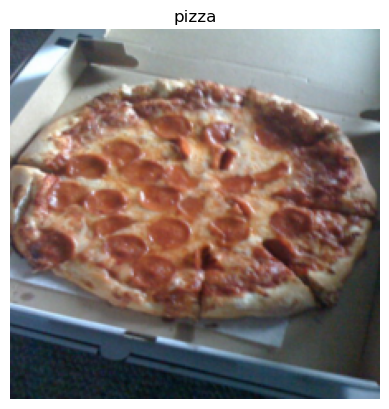

In [12]:
# View single image
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False);

we want to turn this image into patches of itself inline with Figure 1 of the ViT Paper.

How about we start by just visualizing the top row of patches pixels?

We can do this by indexing on the different image dimentions.

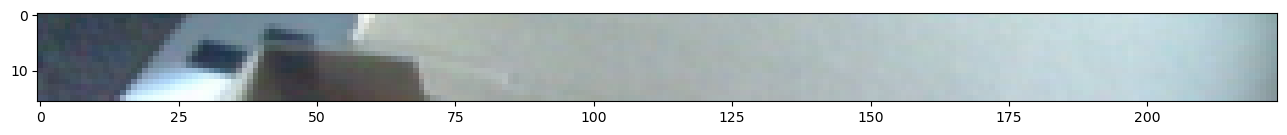

In [13]:
image_permuted = image.permute(1,2,0)

# index to plot the top row of patches pixels
patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :]);

Now we've got the top row, let's turn it into patches.

We can do this by iterating through the number of patches there'd be in the top row.

Number of patches per row: 14.0
Patch size: 16 pixels x 16 pixels


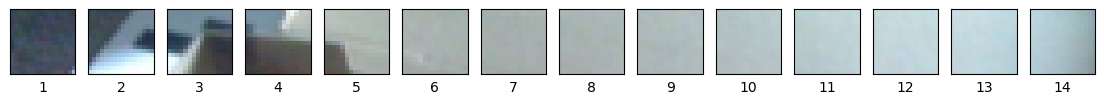

In [14]:
# setup hyperparameters and make sure img_size and patch_size are compatible

img_size = 224
patch_size = 16
number_of_patches = img_size / patch_size
assert img_size % patch_size ==0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {number_of_patches}\nPatch size: {patch_size} pixels x {patch_size} pixels")

# create a series of subplots
fig, axs = plt.subplots(nrows=1,
                        ncols=img_size // patch_size,
                        figsize=(number_of_patches, number_of_patches),
                        sharex=True,
                        sharey=True)

# iterate through number of patches in the top row
for i, patch in enumerate(range(0, img_size, patch_size)):
    axs[i].imshow(image_permuted[:patch_size, patch:patch+patch_size, :]); # keep height index constant, alter the width index
    axs[i].set_xlabel(i+1) # set the label
    axs[i].set_xticks([])
    axs[i].set_yticks([])

Now lets do it for the whole image

Number of patches per row: 14.0        
Number of patches per column: 14.0        
Total patches: 196.0        
Patch size: 16 pixels x 16 pixels


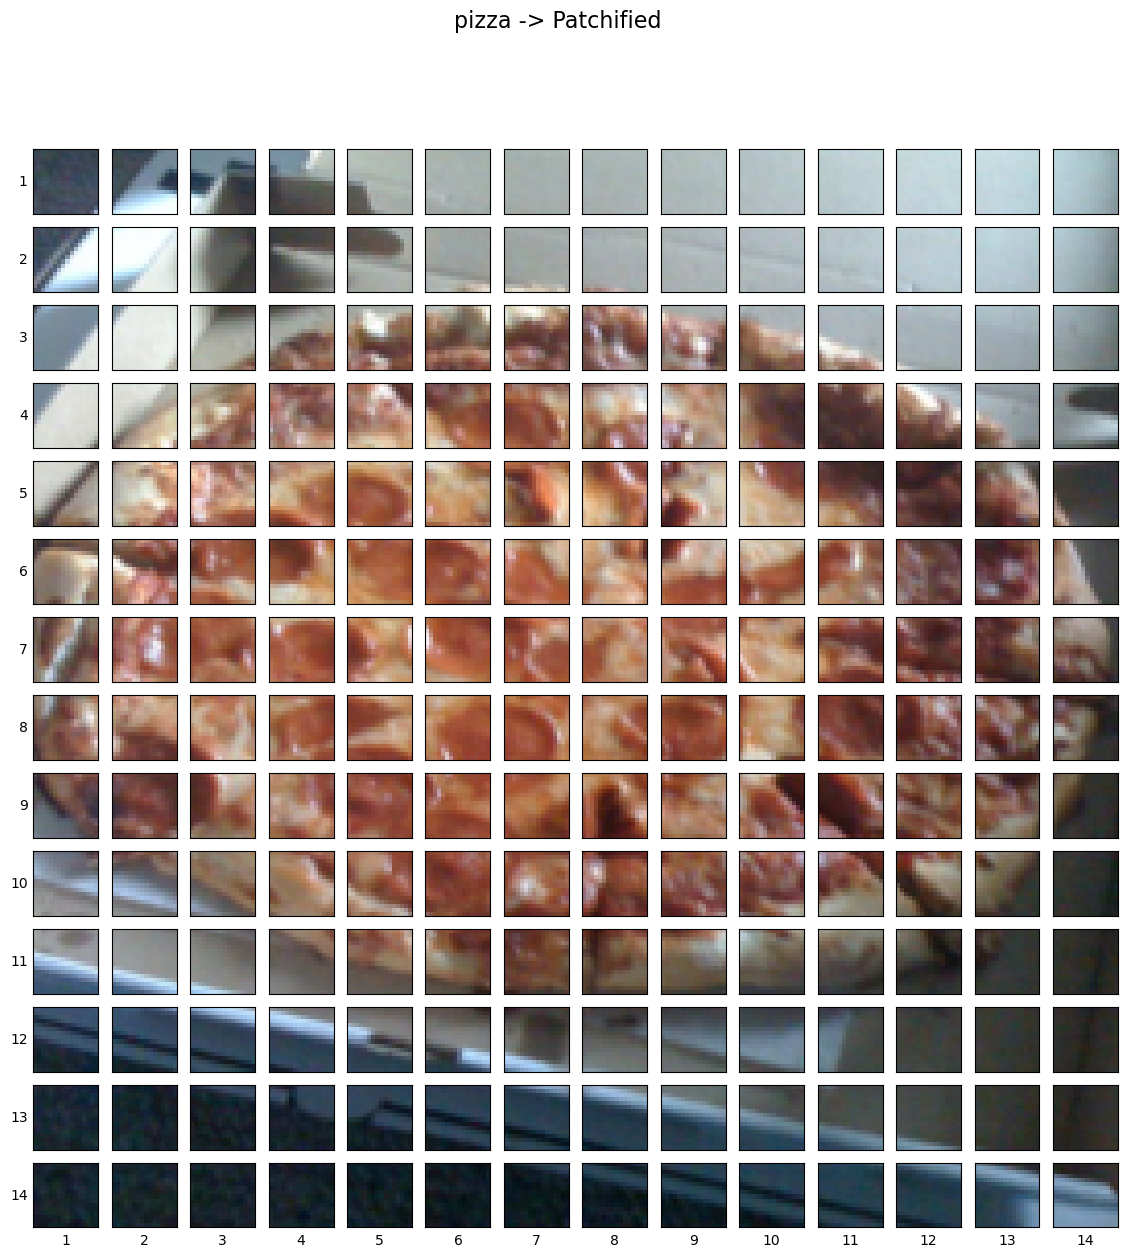

In [15]:
# Setup hyperparameters and make sure img_size and patch_size are compatible
img_size = 224
patch_size = 16
num_patches = img_size/patch_size
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches}\
        \nNumber of patches per column: {num_patches}\
        \nTotal patches: {num_patches*num_patches}\
        \nPatch size: {patch_size} pixels x {patch_size} pixels")

# Create a series of subplots
fig, axs = plt.subplots(nrows=img_size // patch_size, # need int not float
                        ncols=img_size // patch_size,
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)

# Loop through height and width of image
for i, patch_height in enumerate(range(0, img_size, patch_size)): # iterate through height
    for j, patch_width in enumerate(range(0, img_size, patch_size)): # iterate through width

        # Plot the permuted image patch (image_permuted -> (Height, Width, Color Channels))
        axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size, # iterate through height
                                        patch_width:patch_width+patch_size, # iterate through width
                                        :]) # get all color channels

        # Set up label information, remove the ticks for clarity and set labels to outside
        axs[i, j].set_ylabel(i+1,
                             rotation="horizontal",
                             horizontalalignment="right",
                             verticalalignment="center")
        axs[i, j].set_xlabel(j+1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

# Set a super title
fig.suptitle(f"{class_names[label]} -> Patchified", fontsize=16)
plt.show()

How how do we turn each of these pathes into an embedding and convert them into a sequence?

We can use PyTorch layers, `torch.nn.Conv2d()`

### 4.3 Creating image patches with `torch.nn.Conv2d()`

We've seen what an image looks like when it gets turned into patches, now let's start moving towards replicating the patch embedding layers with PyTorch.

To visualize our single image we wrote code to loop through the different height and width dimensions of a single image and plot individual patches.

This operation is very similar to the convolutional operation we saw in 03. PyTorch Computer Vision section 7.1: Stepping through nn.Conv2d().

In fact, the authors of the ViT paper mention in section 3.1 that the patch embedding is achievable with a convolutional neural network (CNN):

> **Hybrid Architecture**. As an alternative to raw image patches, the input sequence can be formed from feature maps of a CNN (LeCun et al., 1989). In this hybrid model, the patch embedding projection $\mathbf{E}$ (Eq. 1) is applied to patches extracted from a **CNN feature map**. As a special case, the patches can have spatial size $1 \times 1$, which means that the **input sequence is obtained by simply flattening the spatial dimensions of the feature map and projecting to the Transformer dimension**. The classification input embedding and position embeddings are added as described above.

The "**feature map**" they're refering to are the weights/activations produced by a convolutional layer passing over a given image.

![](08-vit-paper-patch-embedding-animation.gif)

By setting the `kernel_size` and `stride `parameters of a `torch.nn.Conv2d()` layer equal to the `patch_size`, we can effectively get a layer that splits our image into patches and creates a learnable embedding (referred to as a "Linear Projection" in the ViT paper) of each patch.

**Remember our ideal input and output shapes for the patch embedding layer?**

- **Input**: The image starts as 2D with size ${H \times W \times C}$.
- **Output**: The image gets converted to a 1D sequence of flattened 2D patches with size ${N \times\left(P^{2} \cdot C\right)}$.

**Or for an image size of 224 and patch size of 16:**

- **Input (2D image)**: (224, 224, 3) -> (height, width, color channels)
  
- **Output (flattened 2D patches)**: (196, 768) -> (number of patches, embedding dimension)

We can recreate these with:

- `torch.nn.Conv2d()` for turning our image into patches of CNN feature maps.
- `torch.nn.Flatten()` for flattening the spatial dimensions of the feature map.

Let's start with the `torch.nn.Conv2d(`) layer.

We can replicate the creation of patches by setting the `kernel_size` and `stride` equal to `patch_size`.

In [16]:
from torch import nn

# Set the patch size
patch_size=16

# Create the Conv2d layer with hyperparameters from the ViT paper
conv2d = nn.Conv2d(in_channels=3, # number of color channels
                   out_channels=768, # from Table 1: Hidden size D, this is the embedding size
                   kernel_size=patch_size, # could also use (patch_size, patch_size)
                   stride=patch_size,
                   padding=0)

This means each convolutional kernel will be of size `(patch_size x patch_size)` of if `patch_size=16, (16x16)` (the equivalent to the net patch)

And each step or `stride` of the convolutional kernel will be `patch_size` pixels long or 16 pixels long (equivalent of stepping to the next patch).

We'll set `in_channels=3` for the `number of color channels` in our image and we'll set `out_channels=768`, the same as the $D$ value in Table 1 for ViT-Base (this is the embedding dimension, each image will be embedded into a `learnable vector of size 768`).

Now we've got a convoluational layer, let's see what happens when we pass a single image through it.

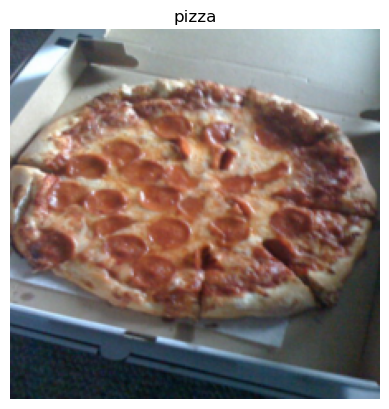

In [17]:
# View single image
plt.imshow(image.permute(1, 2, 0)) # adjust for matplotlib
plt.title(class_names[label])
plt.axis(False);

In [18]:
# Pass the image through the convolutional layer
image_out_of_conv = conv2d(image.unsqueeze(0)) # add a single batch dimension (height, width, color_channels) -> (batch, height, width, color_channels)
print(image_out_of_conv.shape)

torch.Size([1, 768, 14, 14])


Passing our image through the convolutional layer turns it into a series of 768 (this is the embedding size or $D$) feature/activation maps.

So its output shape can be read as:

```
torch.Size([1, 768, 14, 14]) -> [batch_size, embedding_dim, feature_map_height, feature_map_width]
```

Let's visualize five random feature maps and see what they look like.


Showing random convolutional feature maps from indexes: [88, 81, 634, 393, 469]


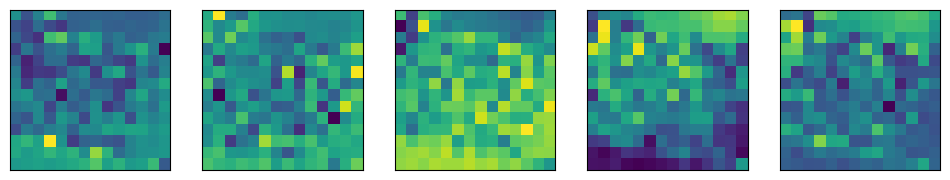

In [28]:
# Plot random 5 convolutional feature maps
import random
random_indexes = random.sample(range(0, 768), k=5) # pick 5 numbers between 0 and the embedding size
print(f"Showing random convolutional feature maps from indexes: {random_indexes}")

# Create plot
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 12))

# Plot random image feature maps
for i, idx in enumerate(random_indexes):
    image_conv_feature_map = image_out_of_conv[:, idx, :, :] # index on the output tensor of the convolutional layer
    axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
    axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);

Notice how the feature maps all kind of represent the original image, after visualizing a few more you can start to see the different major outlines and some major features.

**<div class='alert alert-success'>The important thing to note is that these features may change over time as the neural network learns.</div>**

And because of these, these feature maps can be considered a **learnable embedding** of our image.

Let's check out in numerical form.

In [37]:
# Get a single feature map in tensor form
single_feature_map = image_out_of_conv[:, 767, :, :]
single_feature_map, single_feature_map.requires_grad

(tensor([[[-7.0188e-02, -2.3895e-01,  6.8824e-03,  8.0299e-02, -5.7111e-02,
           -5.7727e-02, -6.3627e-02, -8.1827e-02, -8.8668e-02, -8.8985e-02,
           -1.0064e-01, -1.0720e-01, -1.0512e-01, -9.3265e-02],
          [-6.7372e-02, -1.8351e-01,  9.4658e-02, -6.7995e-03, -1.0653e-01,
           -7.3614e-02, -5.5584e-02, -5.4125e-02, -7.2828e-02, -8.5751e-02,
           -6.8312e-02, -7.6712e-02, -9.8782e-02, -7.9612e-02],
          [-1.1074e-01, -8.9280e-02,  6.1159e-02, -9.7927e-04, -1.0949e-01,
            1.7614e-01,  3.7457e-02,  4.6132e-02, -9.1110e-02,  4.8422e-02,
           -4.3436e-02, -5.2954e-02, -6.5070e-02, -5.7913e-02],
          [-1.6404e-01, -9.6637e-02,  2.8710e-02, -2.6516e-02, -1.0161e-01,
           -3.3699e-02,  1.4429e-01,  2.9065e-02,  5.2685e-02,  2.0518e-02,
            2.0554e-02, -1.9524e-02, -4.0904e-02, -5.8673e-03],
          [ 7.1231e-03, -3.1504e-02,  1.5542e-01, -2.4377e-02,  5.3137e-02,
            5.3723e-02,  1.1470e-01, -2.5788e-02, -9.1306e-0

The `grad_fn` output of the `single_feature_map` and the `requires_grad=True `attribute means PyTorch is tracking the gradients of this feature map and it will be updated by gradient descent during training.

### 4.4 Flattening the patch embedding with `torch.nn.Flatten()`

We've turned our image into patch embeddings but they're still in 2D format.

How do we get them into the desired output shape of the patch embedding alyers of the ViT model?

**Desired Output (1D sequence of flattened 2D patches)**: (196,768) -> (number of patches, embedding dimensions) -> $N \times \left(P^{2} \cdot C\right)$

Let's check the currect shape.

In [42]:
# current tensor shape

print(f'Current tensor shape:\n{image_out_of_conv.shape} -> [batch, embedding_dim, feature_map_height, feature_map_width]')

Current tensor shape:
torch.Size([1, 768, 14, 14]) -> [batch, embedding_dim, feature_map_height, feature_map_width]


Well we've got the 768 part ( $(P^{2} \cdot C)$ ) but we still need the number of patches ($N$).

Reading back through section 3.1 of the ViT paper it says:

> As a special case, the patches can have spatial size $1 \times 1$, which means that the input sequence is obtained by simply flattening the spatial dimensions of the feature map and projecting to the Transformer dimension.


**Flattening the spatial dimensions of the feature map key?** 😦

**What layer do we have in PyTorch that can flatten? 🤯**

How about `torch.nn.Flatten()?` 😍

But we don't want to flatten the whole tensor, we only want to flatten the `spatial dimensions of the feature map`

Which in our case is the `feature_map_height` and `feature_map_width` dimensions of `image_out_of_conv`

So how about we create a `torch.nn.Flatten()` layer to only flatten dimension, we can use the `start_dim` and `end_dim` parameters to set that up.

In [43]:
# create flatten layer

flatten = nn.Flatten(start_dim=2,  # flatten feature_map_height (dimension 2)
                     end_dim=3) # flatten feature_map_width (dimension 3)

---

Nice! Now let's put it all together.

We'll:
1. Take a single image.
2. Put in through the `convolutional layer(conv2d) to turn the image into 2D feature maps` <- `patch embeddings`
3. `Flatten` the 2D feature map `into a single sequence`.

Original image shape: torch.Size([3, 224, 224])
Image feature map shape: torch.Size([1, 768, 14, 14])
Flattened image feature map shape: torch.Size([1, 768, 196])


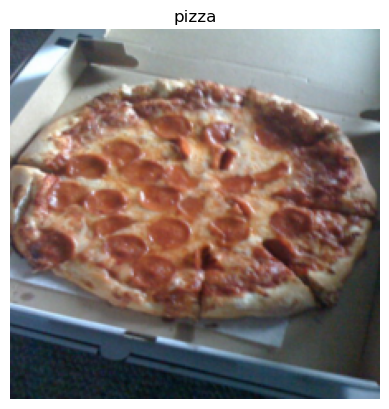

In [48]:
# 1. View single image
plt.imshow(image.permute(1,2,0))
plt.axis(False)
plt.title(class_names[label])
print(f"Original image shape: {image.shape}")

# 2. Turn image into feature maps
image_out_of_conv = conv2d(image.unsqueeze(0)) # add batch dimension to avoid error
print(f"Image feature map shape: {image_out_of_conv.shape}")

# 2. Flatten the feature maps
image_out_of_conv_flattened = flatten(image_out_of_conv)
print(f"Flattened image feature map shape: {image_out_of_conv_flattened.shape}")


Woohoo! It looks like our image_out_of_conv_flattened shape is very close to our desired output shape:

- **Desired output** (flattened 2D patches): (196, 768) -> ${N \times\left(P^{2} \cdot C\right)}$
- **Current shape**: (1, 768, 196)

The only difference is our current shape has a batch size and the dimensions are in a different order to the desired output.

**How to fix this?**
- By rearranging the dimensions.

We can rearrange the dimension using `torch.tensor.permute()` function just like we did to plot with matplotlib.

Let's try.

In [52]:
# get flattened image path embeddings in right shape
image_out_of_conv_flattened_reshaped = image_out_of_conv_flattened.permute(0,2,1)
print(f"Patch embedding sequence shape: {image_out_of_conv_flattened_reshaped.shape} -> [batch_size, num_patches, embedding_size]")

Patch embedding sequence shape: torch.Size([1, 196, 768]) -> [batch_size, num_patches, embedding_size]


Great, we've now matched the desired input and output shapes for the patch embedding layer of the ViT architecture using a couple of PyTorch layers.

Let's visualize one of the flattened feature maps.

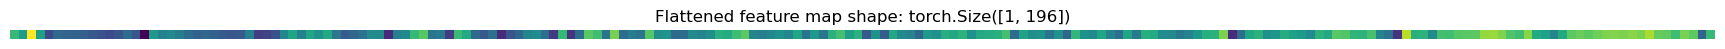

In [59]:
# get a single flattened feature map
single_flattened_feature_map = image_out_of_conv_flattened_reshaped[:,:,0]

# pot the flattened feature map visually
plt.figure(figsize=(22,22))
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.axis(False);

Hmm, the flattened feature map doesn't look like much visually, but that's not what we're concerned about, this is what will be the output of the patching embedding layer and the input to the rest of the ViT architecture.

> **Note**: The original Transformer architecture was designed to work with text. The Vision Transformer architecture (ViT) had the goal of using the original Transformer for images. This is why the input to the ViT architecture is processed in the way it is. **`We're essentially taking a 2D image and formatting it so it appears as a 1D sequence of text`**.

In [60]:
# See the flattened feature map as a tensor
single_flattened_feature_map, single_flattened_feature_map.requires_grad, single_flattened_feature_map.shape

(tensor([[-0.1077, -0.1816,  0.0997, -0.1715, -0.3920, -0.3143, -0.3248, -0.3291,
          -0.3385, -0.3568, -0.3726, -0.3887, -0.3681, -0.3101, -0.3605, -0.5308,
          -0.1896, -0.2548, -0.2334, -0.2651, -0.3050, -0.3319, -0.3227, -0.3318,
          -0.3532, -0.3642, -0.3536, -0.2540, -0.4147, -0.4095, -0.3726, -0.2359,
          -0.1607, -0.2560, -0.1566, -0.2120, -0.1490, -0.2806, -0.3501, -0.3208,
          -0.2955, -0.2274, -0.2307, -0.4536, -0.2601, -0.2288, -0.1074, -0.0645,
          -0.2847, -0.2694, -0.4189, -0.1006, -0.1456, -0.3157, -0.3581, -0.2979,
          -0.4569, -0.3636, -0.3180, -0.2432, -0.2233, -0.3014, -0.4229, -0.1089,
          -0.4358, -0.3022, -0.0612, -0.0925, -0.2891, -0.0301, -0.3100, -0.2640,
          -0.2919, -0.0663, -0.2224, -0.2055, -0.3122, -0.3032, -0.2305, -0.2477,
          -0.2165, -0.1302, -0.1426, -0.0955, -0.0599, -0.2449, -0.2616, -0.2391,
          -0.2100, -0.2367, -0.1587, -0.2916, -0.1924, -0.2859, -0.1318, -0.0886,
          -0.174

Beautiful!

We've turned our single 2D image into a 1D learnable embedding vector (or "Linear Projection of Flattned Patches" in Figure 1 of the ViT paper).

### 4.5. Turning the ViT patch embedding layer into a PyTorch module

Time to put everything we've done for creating the patch embedding into a single PyTorch layer.

We can do so by subclassing `nn.Module` and creating a small PyTorch 'model' to do all of the steps above.

Specifically we'll:
1. Create a class called `PathEmbedding` with subclasses `nn.Module` - so it can be used as a PyTorch layer
2. Initialize the class with the parameters `in_channels=3`, `patch_size=16` (for ViT-Base) and `embedding_dim=768` (this is $D$ for ViT-Base from Table 1.
3. Create a layer to turn an image into patches using `nn.Conv2d()` - just like 4.3 above.
4. Create a layer to flatten the patch feature maps into a single dimension (just like 4.4 above)
5. Define a `forward()` method to take an input and pass it through the layers created in 3 and 4.
6. make sure the output shape reflects the required output shape of the ViT architecture ($N\times\left(P^{2} \cdot C)\right)$

In [73]:
# 1. Create a class that subclasses nn.Module
class PatchEmbedding(nn.Module):
    """Turns a 2D input image into a 1D sequence learnable embedding vector.

    Args:
        in_channels (int): Number of color channels for the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768.
    """
    # 2. Initialize the class with appropriate parameters
    def __init__(self,
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()

        # 3. create a lauyer to turn the image into patches
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                out_channels=embedding_dim,
                                kernel_size=patch_size,
                                stride=patch_size,
                                padding=0)
        self.flatten = nn.Flatten(start_dim=2,
                                 end_dim=3)
    def forward(self, x):
        # check if the inputs are in a correct shape
        image_resolution = x.shape[-1]               
        assert image_resolution % patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {patch_size}"

        # perform the forward pass
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)

        # 6. Make sure the output shape has the current order
        return x_flattened.permute(0, 2, 1) # adjust so the embedding is on the final dimension [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]

Let's try it out on a single image.
-

In [74]:
set_seeds()

# create an instance of patch embedding layer
patchify = PatchEmbedding(in_channels=3, 
                         patch_size=15, 
                         embedding_dim=768)

# pass a single image through
print(f'Input image shape: {image.unsqueeze(0).shape}')
patch_embedded_image = patchify(image.unsqueeze(0)) # add extra bach dimension
print(f'Output patch embedding shape: {patch_embedded_image.shape}')

Input image shape: torch.Size([1, 3, 224, 224])
Output patch embedding shape: torch.Size([1, 196, 768])


Great!!🔥

The output shape matches the ideal input and output shapes we'd like to see from the patch embedding layer:

- **Input**: The image starts as 2D with size ${H \times W \times C}$.
- **Output**: The image gets converted to a 1D sequence of flattened 2D patches with size ${N \times\left(P^{2} \cdot C\right)}$.

Where:
- $(H, W)$ is the resolution of the original image.
- $C$ is the number of channels.
- $(P, P)$ is the resolution of each image patch (patch size).
- $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer.

We've now replicated the patch embedding for equation 1 but not the class token/position embedding.

We'll get to that later on.
![](08-vit-paper-replicating-the-patch-embedding-layer.png)

Our `PatchEmbedding` class (right) replicates the patch embedding of the ViT architecture from Figure 1 and equation 1 from the ViT paper (left). However, `the learnable class embedding and position embeddings haven't been created yet`. These will come soon.

Let's now get a summary of our `PathEmbedding` layer.

In [75]:
from torchinfo import summary

# create random input sizes
random_input_image = (1,3, 224,224)
random_input_image_error = (1,3, 250,250) # will error because the image size doesn't match

# # Get a summary of the input and outputs of PatchEmbedding (uncomment for full output)
summary(PatchEmbedding(),
        input_size=random_input_image, # try swapping this for "random_input_image_error"
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
PatchEmbedding (PatchEmbedding)          [1, 3, 224, 224]     [1, 196, 768]        --                   True
├─Conv2d (patcher)                       [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
├─Flatten (flatten)                      [1, 768, 14, 14]     [1, 768, 196]        --                   --
Total params: 590,592
Trainable params: 590,592
Non-trainable params: 0
Total mult-adds (M): 115.76
Input size (MB): 0.60
Forward/backward pass size (MB): 1.20
Params size (MB): 2.36
Estimated Total Size (MB): 4.17

### 4.6. Creating the class token embedding

`after` the image `patch embedding`, we need to create `class token embedding`.

or $\mathbf{x}_\text {class }$ from equation 1.

![](08-vit-paper-equation-1-the-class-token.png)

*Left*: Figure 1 from the ViT paper with the `classification token` or [class] embedding token we're going to recreate highlighted.

*Right*: Equation 1 and section 3.1 of the ViT paper that relate to the learnable class embedding token.


Reading the second paragraph of section 3.1 from the ViT paper, we see the following description

> Similear to BERT's `[class]` token, we prepend a learnable embedding to the sequence of embedded patches $\left(\mathbf{z}_{0}^{0}=\mathbf{x}_{\text {class }}\right)$, whose state at the output of the Transformer encoder $\left(\mathbf{z}_{L}^{0}\right)$ serves as the image representation $\mathbf{y}$ (Eq. 4).

> *Note*: BERT (Bidirectional Encoder Representations from Transformers) is one of the original machine learning research papers to use the Transformer architecture to achieve outstanding results on natural language processing (NLP) tasks and is where the idea of having a [ class ] token at the start of a sequence originated, class being a description for the "classification" class the sequence belonged to.

So we need to `prepend a learnable embedding to the sequence of embedded patches`

Let's start by viewing our sequence of embedded patches tensor and its shape.

In [79]:
# View the patch embedding and patch embedding shape
print(patch_embedded_image)
print(f"Patch embedding shape: {patch_embedded_image.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[-0.3604,  0.1100, -0.0459,  ...,  0.0077, -0.1667, -0.0708],
         [-0.6190,  0.1500, -0.1618,  ...,  0.0883, -0.1455,  0.0672],
         [-0.4996,  0.3919,  0.0174,  ..., -0.1196, -0.3698,  0.1018],
         ...,
         [-0.4614,  0.0935,  0.0077,  ...,  0.0086, -0.1960, -0.0026],
         [-0.3652,  0.2346, -0.1405,  ..., -0.0009, -0.2282, -0.0268],
         [-0.2310,  0.1212, -0.0587,  ...,  0.0074, -0.0926, -0.0154]]],
       grad_fn=<PermuteBackward0>)
Patch embedding shape: torch.Size([1, 196, 768]) -> [batch_size, number_of_patches, embedding_dimension]


To "prepend a learnable embedding to the sequence of embedded patches" we need to create a learnable embedding in the shape of the `embedding_dimension` ($D$) and then add it to the `number_of_patches` dimension

Or in pseudocode:
```
patch_embedding = [image_patch_1, image_patch_2, image_patch_3...]
class_token = learnable_embedding
patch_embedding_with_class_token = torch.cat((class_token, patch_embedding), dim=1)
```

Notice the concatenation (`torch.cat()`) happens on `dim=1` (the `number_of_patches` dimension).

Let's create a learnable embedding for the class token.

To do so, we'll get the batch size and embedding dimension shape and then we'll create a `torch.ones()` tensor in the shape `[batch_size, 1, embedding_dimension]`.

And we'll make the tensor learnable by passing it to `nn.Parameter()` with `requires_grad=True`.

In [87]:
# get the batch size and embedding dimension
batch_size = patch_embedded_image.shape[0]
embedding_dimension = patch_embedded_image.shape[2]

# create the class token embedding as a learnable parameter that shares the same size as the embedding dimension (D)
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True) # making embedding learnable

# show the first 10 examples of the class token
print(class_token[:,:,:10])

# print the class token shape
print(f"Class token shape: {class_token.shape} -> [batch_size, number_of_tokens, embedding_dimension]")

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
Class token shape: torch.Size([1, 1, 768]) -> [batch_size, number_of_tokens, embedding_dimension]


> **Note**: Here we're only creating the class token embedding as `torch.ones()` for demonstration purposes, in reality, you'd likely create the class token embedding with `torch.randn()` (since machine learning is all about harnessing the power of controlled randomness, you generally start with a random number and improve it over time)

See how the `number_of_tokens` dimension of `class_token` is `1` since we only want to prepend one class token value to the start of the patch embedding sequence.

Now we've got the class token embedding, let's prepend it to our sequence of image patches `patch_embedded_image`

We can do so using `torch.cat()` and set `dim=1` (so `class_token`'s `number_of_tokens` dimension is prepended to `patch_embedded_image`'s `number_of_patches` dimension)

In [88]:
# Add the class token embedding to the front of the patch embedding
patch_embedded_image_with_class_embedding = torch.cat((class_token, patch_embedded_image),
                                                      dim=1) # concat on first dimension

# Print the sequence of patch embeddings with the prepended class token embedding
print(patch_embedded_image_with_class_embedding)
print(f"Sequence of patch embeddings with class token prepended shape: {patch_embedded_image_with_class_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  1.0000e+00,
           1.0000e+00,  1.0000e+00],
         [-3.6040e-01,  1.1005e-01, -4.5942e-02,  ...,  7.7061e-03,
          -1.6666e-01, -7.0768e-02],
         [-6.1904e-01,  1.5003e-01, -1.6184e-01,  ...,  8.8274e-02,
          -1.4549e-01,  6.7214e-02],
         ...,
         [-4.6140e-01,  9.3485e-02,  7.6853e-03,  ...,  8.6020e-03,
          -1.9602e-01, -2.6315e-03],
         [-3.6522e-01,  2.3456e-01, -1.4052e-01,  ..., -9.2227e-04,
          -2.2821e-01, -2.6848e-02],
         [-2.3101e-01,  1.2118e-01, -5.8691e-02,  ...,  7.4111e-03,
          -9.2600e-02, -1.5374e-02]]], grad_fn=<CatBackward0>)
Sequence of patch embeddings with class token prepended shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


Sweet! Learnable class token prepended!
-
![](08-vit-paper-equation-1-prepending-the-learnable-class-token.png)

*Reviewing what we've done to create the learnable class token, we start with a sequence of image patch embeddings created by `PatchEmbedding()` on single image, we then created a learnable class token with one value for each of the embedding dimensions and then prepended it to the original sequence of patch embeddings.*

***Note**: Using `torch.ones()` to create the learnable class token is mostly for demonstration purposes only, in practice, you'd likely create it with `torch.randn()`.*

### 4.7 Creating the position embedding

We've already got:
1. Class token embedding
2. Patch embedding

Let's create the position embedding now.

Or $\mathbf{E}_{\text {pos }}$ from equation 1 where $E$ stands for "embedding".

![](08-vit-paper-equation-1-the-position-embeddings.png)

*Left: Figure 1 from the ViT paper with the position embedding we're going to recreate highlighted.*

*Right: Equation 1 and section 3.1 of the ViT paper that relate to the position embedding*

Let's find our more about by reading section 3.1 of the ViT paper.
> **Position embeddings** are added to the patch embeddings to retain positional information. We use **standard learnable 1D position embeddings**, since we have not observed significant performance gains from using more advanced 2D-aware position embeddings (Appendix D.4). The resulting sequence of embedding vectors serves as input to the encoder.

By `retain positional information` the authors mean they want the architecture to know what `order` the patches comes in. As in, patch two comes after the patch one and pathch three comes after the patch two and so on.

The positional information can be important when considering what's in an image (without positional information and a flattened sequence could be seen as having no order and thus no patch relates to any other patch)

To start creating the position embeddings, let's view our current embedding.

In [89]:
# View the sequence of patch embeddings with the prepensed class embedding
patch_embedded_image_with_class_embedding, patch_embedded_image_with_class_embedding.shape

(tensor([[[ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  1.0000e+00,
            1.0000e+00,  1.0000e+00],
          [-3.6040e-01,  1.1005e-01, -4.5942e-02,  ...,  7.7061e-03,
           -1.6666e-01, -7.0768e-02],
          [-6.1904e-01,  1.5003e-01, -1.6184e-01,  ...,  8.8274e-02,
           -1.4549e-01,  6.7214e-02],
          ...,
          [-4.6140e-01,  9.3485e-02,  7.6853e-03,  ...,  8.6020e-03,
           -1.9602e-01, -2.6315e-03],
          [-3.6522e-01,  2.3456e-01, -1.4052e-01,  ..., -9.2227e-04,
           -2.2821e-01, -2.6848e-02],
          [-2.3101e-01,  1.2118e-01, -5.8691e-02,  ...,  7.4111e-03,
           -9.2600e-02, -1.5374e-02]]], grad_fn=<CatBackward0>),
 torch.Size([1, 197, 768]))

Equation 1 states that the position embeddings ($\mathbf{E}_{\text {pos }}$) should have the shape $(N + 1) \times D$:

$$\mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D}$$

Where:

- $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer (number of patches).
- $D$ is the size of the patch embeddings, different values for $D$ can be found in Table 1 (embedding dimension).

Luckily we've got both of these values already.

So let's make a learnable 1D embedding with `torch.ones()` to create $\mathbf{E}_{\text {pos }}$.
-

In [93]:
# calculate N
number_of_patches = int((height*width) / patch_size**2)

# get embededing dimension
embedding_dimension = patch_embedded_image_with_class_embedding.shape[2]

# create the learnable 1D position embedding
position_embedding = nn.Parameter(torch.ones(1, 
                                             number_of_patches+1, 
                                             embedding_dimension),
                                  requires_grad=True)

# show the first 10 sequences and 10 position embedding value and check the 
# shape of the postion embedding
print(position_embedding[:,:10,:10])
print(f"Position embeddding shape: {position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")


tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
Position embeddding shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


Position embedding created!

Let's add them to our sequence of patch embeddings with a prepended class token.

In [94]:
# Add the position embedding to the patch and class token embedding
patch_and_position_embedding = patch_embedded_image_with_class_embedding + position_embedding

print(patch_and_position_embedding)
print(f"Patch embeddings, class token prepended and positional embeddings added shape: {patch_and_position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.6396, 1.1100, 0.9541,  ..., 1.0077, 0.8333, 0.9292],
         [0.3810, 1.1500, 0.8382,  ..., 1.0883, 0.8545, 1.0672],
         ...,
         [0.5386, 1.0935, 1.0077,  ..., 1.0086, 0.8040, 0.9974],
         [0.6348, 1.2346, 0.8595,  ..., 0.9991, 0.7718, 0.9732],
         [0.7690, 1.1212, 0.9413,  ..., 1.0074, 0.9074, 0.9846]]],
       grad_fn=<AddBackward0>)
Patch embeddings, class token prepended and positional embeddings added shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


Notice how the values of each of the elements in the embedding tensor `increases by 1` (this is because of the position embeddings being created with `torch.ones()`).

**Note**: We could put both the class token embedding and position embedding into their `own layer` if we wanted to. But we'll see later on in `section 8` how they can be incorporated into the overall ViT architecture's `forward()` method.

![](08-vit-paper-equation-1-patch-embeddings-with-learnable-class-token-and-position-embeddings)

*The workflow we've used for adding the position embeddings to the sequence of patch embeddings and class token.*

***Note**: `torch.ones()` only used to create embeddings for illustration purposes, in practice, you'd likely use `torch.randn()` to start with a random number.*

### 4.8 Putting it all together: From image to embedding

Alright, we've come a long way in terms of turning our input images into an embedding and replicating equation 1 from section 3.1 of the ViT paper. 

$$ \begin{aligned} \mathbf{z}_{0} &=\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_{p}^{1} \mathbf{E} ; \mathbf{x}_{p}^{2} \mathbf{E} ; \cdots ; \mathbf{x}_{p}^{N} \mathbf{E}\right]+\mathbf{E}_{\text {pos }}, & & \mathbf{E} \in \mathbb{R}^{\left(P^{2} \cdot C\right) \times D}, \mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D} \end{aligned} $$

Let's now put everything together in a single code cell and go from input image ($\mathbf{x}$) to output embedding ($\mathbf{z}_0$).
-

